In [1]:
import cufflinks as cf
cf.go_offline()
import plotly 
import plotly.graph_objects as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import plotReportLib
from plotReportLib import myfunctions as fcn
import cufflinks as cf
cf.go_offline()

In [2]:
plotly.io.templates.default = "none"
mode_template = go.layout.Template()
mode_template.data.scatter = [
    go.Scatter(
        marker=dict(
            symbol="circle", size=4
        )
    )
]

layout = go.Layout(
xaxis=dict(
showline=True , 
showgrid=False,
showticklabels=True,
linecolor='rgb(204, 204, 204)',
linewidth=2 , 
ticks='outside', 
tickfont=dict(
    family='Arial',
size = 12,
color='rgb(82,82,82)',
),
),
yaxis=dict(
showgrid=False,
zeroline=False,
showline=False,
showticklabels=True),
autosize=False,
width=500,
height=1500,
margin=dict(
autoexpand=True, l=100, r=20, t=110,),
showlegend=True, 
plot_bgcolor='white')

In [3]:
flow_data    = fcn.importPlotData('../01-mean-flow/mean-flow0032.dat')

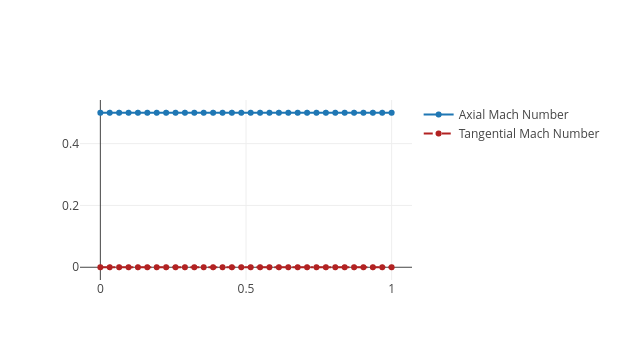

In [4]:
plotly.express.line(
    flow_data,
    x='radius',
    y=['M_x','M_theta'],
    labels={'x':'radius', 'y': 'Flow Velocity [-]'}, title = 'Velocity Profile')

fig = go.Figure()
#fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=flow_data['radius'], y = flow_data['M_x'],
                        mode='lines+markers', name = 'Axial Mach Number'))
fig.add_trace(go.Scatter(x=flow_data['radius'], y = flow_data['M_theta'],
                        mode='lines+markers', name = 'Tangential Mach Number',
                        line=dict(color='firebrick',width=2,dash='dashdot')))


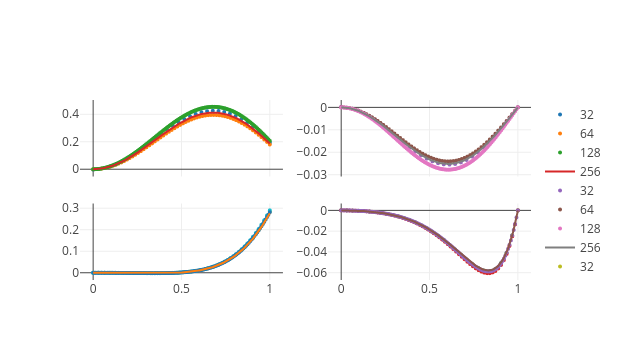

In [5]:
directory_32  ='../04-EVanalysis/SWIRLVerification/Table4_3/SecondOrderDiff/32pts/'
directory_64  ='../04-EVanalysis/SWIRLVerification/Table4_3/SecondOrderDiff/64pts/'
directory_128 ='../04-EVanalysis/SWIRLVerification/Table4_3/SecondOrderDiff/128pts/'
directory_256 ='../04-EVanalysis/SWIRLVerification/Table4_3/SecondOrderDiff/256pts/'
zero_crossings = ['0']
propagation_index_32 = ['0034', '0033', '0031', '0029', '0027', '0025', '0023', 
                        '0064', '0062', '0060', '0058', '0056', '0054', '0052']

propagation_index_64 = ['0068', '0067', '0065', '0063', '0061', '0059', '0055', '0053', '0051',
                        '0128', '0126', '0124', '0122', '0120', '0118', '0116', '0114', '0113']

propagation_index_128 = ['0234', '0233', '0231', '0229', '0227', '0223', '0213', '0119','0117' ,
                         '0256', '0254', '0252', '0250', '0248', '0246', '0244', '0242','0240' ]

propagation_index_256 = ['0494', '0493', '0491', '0489', '0487', '0485', '0481', '0477', '0473','0451',
                         '0512', '0510', '0508', '0506', '0504', '0502', '0500', '0498', '0496', '0467']
egvfile_32 = []
egvfile_64 = []
egvfile_128 = []
egvfile_256 = []
for i in range(len(propagation_index_32)):
    egvfile_32.append(directory_32 + 'egv.'+  propagation_index_32[i])
    
for i in range(len(propagation_index_64)):
    egvfile_64.append(directory_64 + 'egv.'+  propagation_index_64[i])
    
for i in range(len(propagation_index_128)):
    egvfile_128.append(directory_128 + 'egv.'+  propagation_index_128[i])

for i in range(len(propagation_index_256)):
    egvfile_256.append(directory_256 + 'egv.'+  propagation_index_256[i])

mode_data_32  = []
mode_data_64  = []
mode_data_128  = []
mode_data_256  = []
for i in range(len(propagation_index_32)): 
    mode_data_32.append(
        fcn.importPlotData(
            str(egvfile_32 [i])
        )
    )
for i in range(len(propagation_index_64)): 
    mode_data_64.append(
        fcn.importPlotData(
            str(egvfile_64 [i])
        )
    )
for i in range(len(propagation_index_128)): 
    mode_data_128.append(
        fcn.importPlotData(
            str(egvfile_128 [i])
        )
    )
for i in range(len(propagation_index_256)): 
    mode_data_256.append(
        fcn.importPlotData(
            str(egvfile_256 [i])
        )
    )

num_of_modes = 2
fig = plotly.subplots.make_subplots(rows=num_of_modes, cols=2,shared_xaxes='columns')
fig.update_layout(template=mode_template)
y_str = ['p_no_phase[Re]', 'p_no_phase[Im]']

for i in range(num_of_modes):
    for j in range(2):
        fig.add_trace(
            go.Scatter(
                x = mode_data_32[i]['Rad'],
                y = mode_data_32[i][y_str[j]],
                mode='markers',
                name = '32',
            ),
            row = i+1, col = j+1,

        )
        
        fig.add_trace(
            go.Scatter(
                x = mode_data_64[i]['Rad'],
                y = mode_data_64[i][y_str[j]],
                mode='markers', 
                name = '64',
            ),
            row = i+1, col = j+1,
        )
        fig.add_trace(
            go.Scatter(
                x    = mode_data_128[i]['Rad'],
                y    = mode_data_128[i][y_str[j]],
                mode ='markers', 
                name = '128',
            ),
            row = i+1, col = j+1,
        )
         
        fig.add_trace(
            go.Scatter(
                x    = mode_data_256[i]['Rad'],
                y    = mode_data_256[i][y_str[j]],
                mode = 'lines', 
                name = '256',
            ),
            row = i+1, col = j+1,
        )
        
fig.show()